## Network Analysis

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time

### Read in data

In [4]:
G_sampled = nx.read_gml("../Data/G_data_sampled.gml")
G = nx.read_gml("../Data/G_data.gml")

In [5]:
nodes_sbux = (node 
              for node, data
              in G.nodes(data=True)
              if data.get("brand") == "starbucks")
G_sbux = G.subgraph(nodes_sbux)
print("~~~ Starbucks Network ~~~")
print("Number of Nodes: ", len(G_sbux.nodes))
print("Number of Edges: ", len(G_sbux.edges))

~~~ Starbucks Network ~~~
Number of Nodes:  5756
Number of Edges:  178923


In [6]:
nodes_dd = (node 
              for node, data
              in G.nodes(data=True)
              if data.get("brand") == "dunkin")
G_dd = G.subgraph(nodes_dd)
print("~~~ Dunkin Network ~~~")
print("Number of Nodes: ", len(G_dd.nodes))
print("Number of Edges: ", len(G_dd.edges))

~~~ Dunkin Network ~~~
Number of Nodes:  5411
Number of Edges:  97487


### Quick Plots

##### Colored by Brand

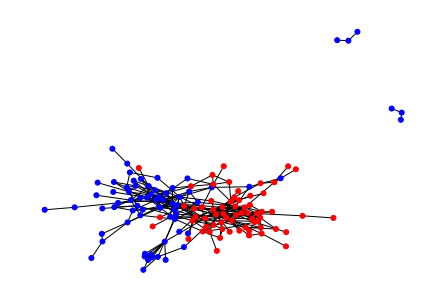

In [5]:
node_color = []

for node in G_sampled.nodes(data=True):

    if 'starbucks' in node[1]['brand']:
        node_color.append('blue')
    elif 'dunkin' in node[1]['brand']:
        node_color.append('red')

nx.draw(G_sampled, with_labels=False, node_size=25, node_color=node_color)

##### Colored by Sentiment

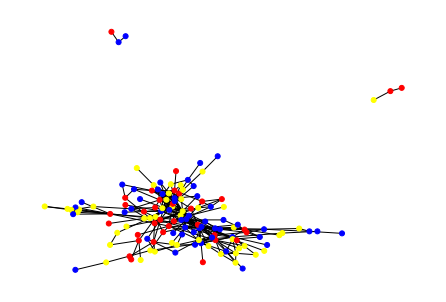

In [6]:
node_color = []

for node in G_sampled.nodes(data=True):

    if 'positive' in node[1]['sentiment']:
        node_color.append('blue')
    elif 'negative' in node[1]['sentiment']:
        node_color.append('red')
    elif 'neutral' in node[1]['sentiment']:
        node_color.append('yellow')

nx.draw(G_sampled, with_labels=False, node_size=25, node_color=node_color)

##### Colored by Influencer Status

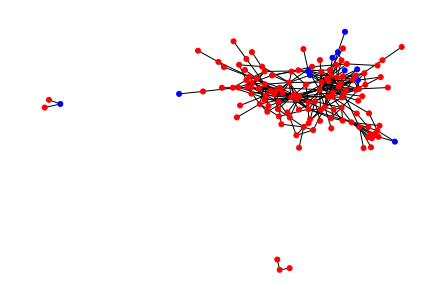

In [7]:
node_color = []

for node in G_sampled.nodes(data=True):

    if 'Yes' in node[1]['influencer_status']:
        node_color.append('blue')
    elif 'No' in node[1]['influencer_status']:
        node_color.append('red')

nx.draw(G_sampled, with_labels=False, node_size=25, node_color=node_color)

In [8]:
import numpy as np

def network_summary(G):

    def centrality_stats(x):
        x1=dict(x)
        x2=np.array(list(x1.values())); #print(x2)
        print("	min:" ,min(x2))
        print("	mean:" ,np.mean(x2))
        print("	median:" ,np.median(x2))
        # print("	mode:" ,stats.mode(x2)[0][0])
        print("	max:" ,max(x2))
        x=dict(x)
        sort_dict=dict(sorted(x1.items(), key=lambda item: item[1],reverse=True))
        print("	top nodes:",list(sort_dict)[0:6])
        print("	          ",list(sort_dict.values())[0:6])

    try: 
        print("GENERAL")
        print("	number of nodes:",len(list(G.nodes)))
        print("	number of edges:",len(list(G.edges)))

        print("	is_directed:", nx.is_directed(G))
        print("	is_weighted:" ,nx.is_weighted(G))


        if(nx.is_directed(G)):
            print("IN-DEGREE (NORMALIZED)")
            centrality_stats(nx.in_degree_centrality(G))
            print("OUT-DEGREE (NORMALIZED)")
            centrality_stats(nx.out_degree_centrality(G))
        else:
            print("	number_connected_components", nx.number_connected_components(G))
            print("	number of triangle: ",len(nx.triangles(G).keys()))
            print("	density:" ,nx.density(G))
            print("	average_clustering coefficient: ", nx.average_clustering(G))
            print("	degree_assortativity_coefficient: ", nx.degree_assortativity_coefficient(G))
            print("	is_tree:" ,nx.is_tree(G))

            if(nx.is_connected(G)):
                print("	diameter:" ,nx.diameter(G))
                print("	radius:" ,nx.radius(G))
                print("	average_shortest_path_length: ", nx.average_shortest_path_length(G))

            #CENTRALITY 
            print("DEGREE (NORMALIZED)")
            centrality_stats(nx.degree_centrality(G))

            print("CLOSENESS CENTRALITY")
            centrality_stats(nx.closeness_centrality(G))

            print("BETWEEN CENTRALITY")
            centrality_stats(nx.betweenness_centrality(G))
    except:
        print("unable to run")
        print("DEGREE (NORMALIZED)")
        centrality_stats(nx.degree_centrality(G))
        print("CLOSENESS CENTRALITY")
        centrality_stats(nx.closeness_centrality(G))
        print("BETWEEN CENTRALITY")
        centrality_stats(nx.betweenness_centrality(G))

In [9]:
network_summary(G)

GENERAL
	number of nodes: 11167
	number of edges: 302028
	is_directed: False
	is_weighted: False
	number_connected_components 116
	number of triangle:  11167
	density: 0.004844434215402169
	average_clustering coefficient:  0.4036583393787599
	degree_assortativity_coefficient:  0.27516717784868655
	is_tree: False
DEGREE (NORMALIZED)
	min: 8.955758552749418e-05
	mean: 0.004844434215402169
	median: 0.0013433637829124126
	max: 0.09475192548808883
	top nodes: ['D4276', 'S5687', 'S6754', 'D904', 'D6457', 'D5705']
	           [0.09475192548808883, 0.07101916532330288, 0.06475013433637829, 0.06475013433637829, 0.06385455848110334, 0.060809600573168546]
CLOSENESS CENTRALITY
	min: 8.955758552749418e-05
	mean: 0.2923985517477583
	median: 0.30022347078715533
	max: 0.4362805876302695
	top nodes: ['D4276', 'S6754', 'D904', 'S5687', 'D5705', 'D3669']
	           [0.4362805876302695, 0.43477623356594775, 0.43477623356594775, 0.4293479194900504, 0.42797736487393134, 0.424189347827308]
BETWEEN CENTRALIT

In [ ]:
network_summary(G_sbux)

In [ ]:
network_summary(G_dd)

In [25]:
import seaborn as sns
import numpy as np

def plot_degree_distribution(G,outname ="plot_degree.pdf"):

    #PARAM
    BINS=20
    FS=9

    #INITIALIZE MPL FIGURE+AX
    fig, ax = plt.subplots(1, 4) # or what ever layout you want
    fig.set_size_inches(25, 5)
    #----------------------------
    #DEGREE
    #----------------------------

    plt.title("Linear graph")

    #------------------
    #PDF
    #------------------
    df=pd.DataFrame(G.degree()); #print(df)
    sns.histplot(data=df, x=1,bins=BINS,stat="probability", kde=False,ax=ax[0])
    ax[0].set_xlabel("Degree",fontsize=FS)
    ax[0].set_ylabel("Probability",fontsize=FS)
    ax[0].set_aspect('auto', 'box')
    ax[0].title.set_text('PDF')



    #------------------
    #LOG-LOG PDF
    #------------------
    #GET DATA POINTS 
    y=np.array(list(dict(G.degree()).values())); # print(len(G.nodes()),y.shape)
    bin_counts, bin_edges, patches = ax[1].hist(y, bins=BINS); ax[1].clear()
    bin_points=(np.array(bin_edges[1:])+np.array(bin_edges[0:-1]))/2.0
    # bin_points=np.array(bin_edges[1:])
    dx=bin_points[1]-bin_points[0]
    y=np.array(bin_counts)/len(y) #/dx;   #print(y, len(bin_points),len(bin_counts))

    #PLOT
    ax[1].plot(bin_points,y,"-o")
    # ax[0,1].set_xlim([1, 1.1*max(bin_points)])
    # ax[0,1].set_ylim([0.0000001, 1])
    ax[1].set_ylabel("Probability",fontsize=FS)
    ax[1].set_xlabel("Degree",fontsize=FS)
    ax[1].set_xscale("log")
    ax[1].set_yscale("log")
    ax[1].set_aspect('auto', 'box')
    ax[1].title.set_text('PDF log-log')


    #------------------
    #cCDF
    #------------------
    sns.ecdfplot(data=df, complementary=True, x=1,ax=ax[2])
    ax[2].set_ylabel("cCDF",fontsize=FS)
    ax[2].set_xlabel("Degree",fontsize=FS)
    ax[2].set_aspect('auto', 'box')
    ax[2].title.set_text('cCDF')

    #------------------
    #cCDF log-log
    #------------------
    sns.ecdfplot(data=df, complementary=True, x=1,ax=ax[3])
    ax[3].set_ylabel("cCDF",fontsize=FS)
    ax[3].set_xscale("log")
    ax[3].set_yscale("log")
    ax[3].set_xlabel("Degree",fontsize=FS)
    ax[3].set_aspect('auto', 'box')
    ax[3].title.set_text("cCDF log-log")


    plt.savefig(outname)
    plt.show()

    

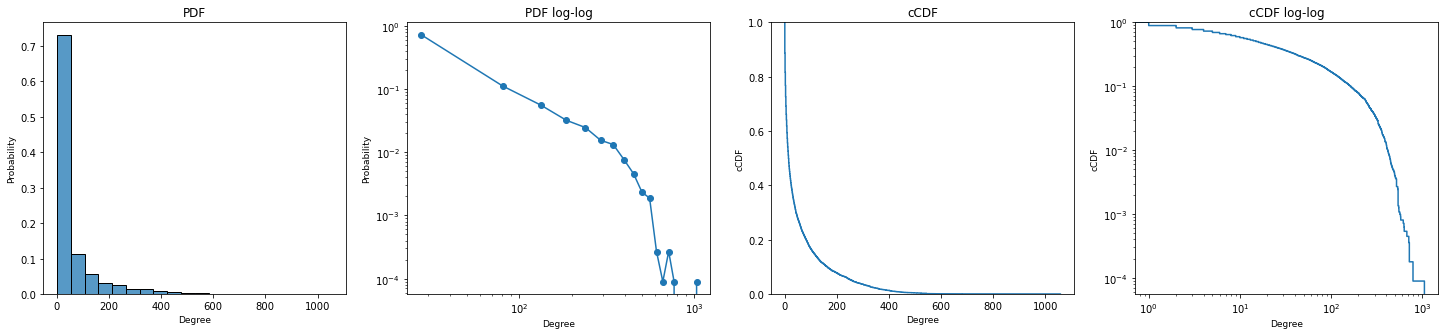

In [26]:
plot_degree_distribution(G)

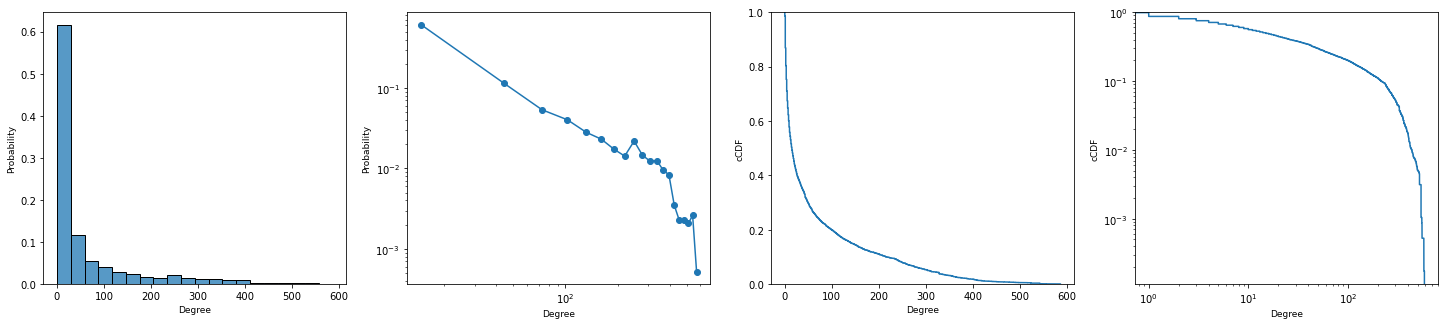

In [31]:
plot_degree_distribution(G_sbux)

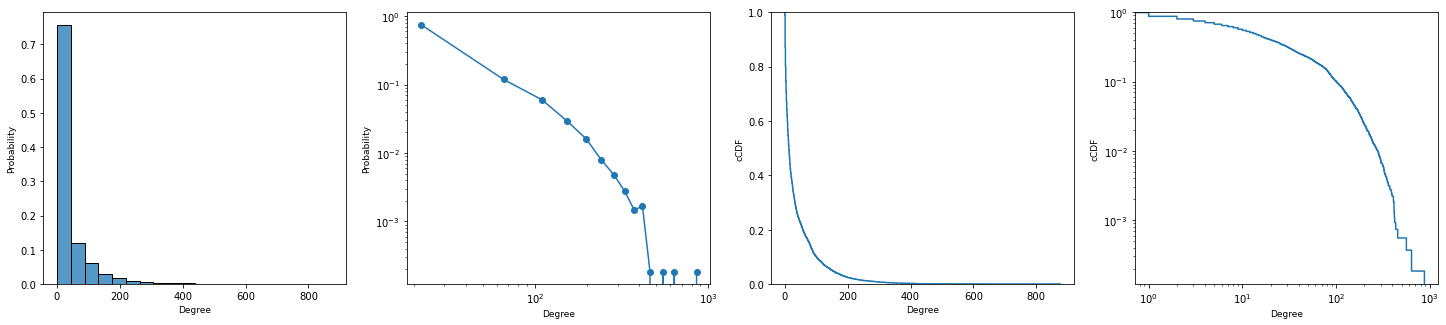

In [32]:
plot_degree_distribution(G_dd)

In [14]:
import seaborn as sns


def plot_centrality_correlation(G,path=""):
    C1=list(nx.degree_centrality(G).values())
    C2=list(nx.closeness_centrality(G).values())
    C3=list(nx.betweenness_centrality(G).values())
    df=pd.DataFrame([C1,C2,C3]).transpose()
    df=df.rename(columns={0: "Degree", 1: "Closeness", 2: "Betweenness"})
    sns.pairplot(df)

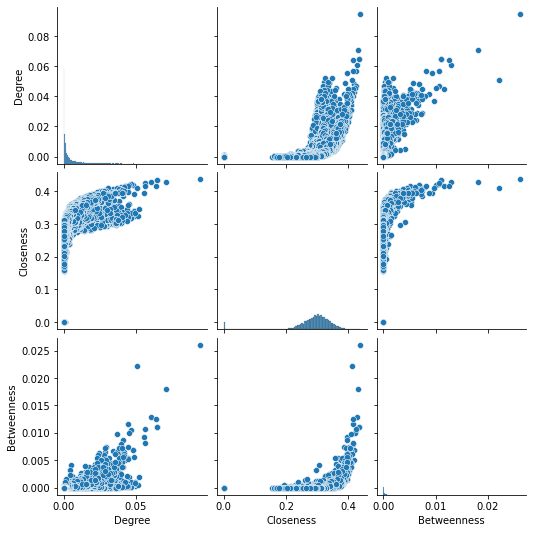

In [15]:
plot_centrality_correlation(G)

In [19]:
def plot_network(G,node_color="degree",layout="random"):
    
    # POSITIONS LAYOUT
    N=len(G.nodes)
    if(layout=="spring"):
        # pos=nx.spring_layout(G,k=50*1./np.sqrt(N),iterations=100)
        pos=nx.spring_layout(G)

    if(layout=="random"):
        pos=nx.random_layout(G)

    #INITALIZE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)

    # NODE COLORS
    cmap=plt.cm.get_cmap('Greens')

    # DEGREE 
    if node_color=="degree":
            centrality=list(dict(nx.degree(G)).values())
  
    # BETWENNESS 
    if node_color=="betweeness":
            centrality=list(dict(nx.betweenness_centrality(G)).values())
  
    # CLOSENESS
    if node_color=="closeness":
            centrality=list(dict(nx.closeness_centrality(G)).values())

    # NODE SIZE CAN COLOR
    node_colors = [cmap(u/(0.01+max(centrality))) for u in centrality]
    node_sizes = [4000*u/(0.01+max(centrality)) for u in centrality]

    # #PLOT NETWORK
    nx.draw(G,
            with_labels=True,
            edgecolors="black",
            node_color=node_colors,
            node_size=node_sizes,
            font_color='white',
            font_size=18,
            pos=pos
            )

    plt.show()


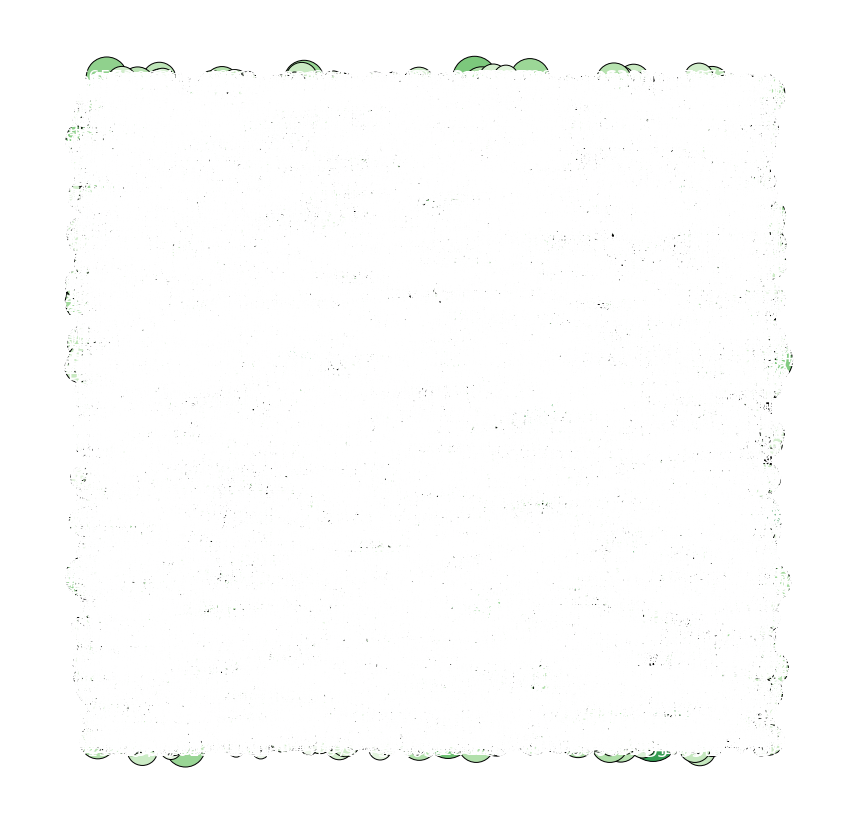